# Quartet d'Anscombe

[Page wikipedia](https://fr.wikipedia.org/wiki/Quartet_d%27Anscombe)

Construits en 1973 par le statisticien Francis Anscombe dans le but de démontrer l'importance de tracer des graphiques avant d'analyser un ensemble de données.

In [1]:
%pylab --no-import-all inline
from scipy.stats import linregress, pearsonr

Populating the interactive namespace from numpy and matplotlib


## Lecture des données

In [2]:
all_sets = list()
for i in range(0, 8, 2):
    x, y = np.loadtxt("anscombe.dat", usecols=(i, i+1), skiprows=1, unpack=True)
    all_sets.append((x, y))

In [3]:
print(all_sets[0][0])
print(all_sets[0][1])

[ 10.   8.  13.   9.  11.  14.   6.   4.  12.   7.   5.]
[  8.04   6.95   7.58   8.81   8.33   9.96   7.24   4.26  10.84   4.82
   5.68]


## Calcul des propriétés statistique

Ici on montre que les quatre jeux de données ont les même propriétés statistiques.

In [4]:
def show_stat(data):
    x, y = data
    print("moyenne  x  : %4.2f" % x.mean())
    print("variance x  : %4.2f" % np.var(x))
    print("moyenne  y  : %4.2f" % y.mean())
    print("variance y  : %4.2f" % np.var(y))
    cor, p = pearsonr(x, y)
    print("corrélation : %5.3f" % cor)
    
    a, b, r, p_value, std_err = linregress(x, y)
    print("regression linéaire : %3.1f x + %3.1f (r^2 = %4.2f)" % (a, b, r**2))

In [5]:
for i, data in enumerate(all_sets):
    print("\nset %d" % i)
    print("------")
    show_stat(data)


set 0
------
moyenne  x  : 9.00
variance x  : 10.00
moyenne  y  : 7.50
variance y  : 3.75
corrélation : 0.816
regression linéaire : 0.5 x + 3.0 (r^2 = 0.67)

set 1
------
moyenne  x  : 9.00
variance x  : 10.00
moyenne  y  : 7.50
variance y  : 3.75
corrélation : 0.816
regression linéaire : 0.5 x + 3.0 (r^2 = 0.67)

set 2
------
moyenne  x  : 9.00
variance x  : 10.00
moyenne  y  : 7.50
variance y  : 3.75
corrélation : 0.816
regression linéaire : 0.5 x + 3.0 (r^2 = 0.67)

set 3
------
moyenne  x  : 9.00
variance x  : 10.00
moyenne  y  : 7.50
variance y  : 3.75
corrélation : 0.817
regression linéaire : 0.5 x + 3.0 (r^2 = 0.67)


## Représentation graphique des données

La représentation graphique de ces jeux de données a deux objectifs. Elle montre

* qu'il est important de visualiser les données pour faire une interprétation
* que des données abérantes peuvent avoir un impact majeur sur certaines propriétés statistique telle que la moyenne.

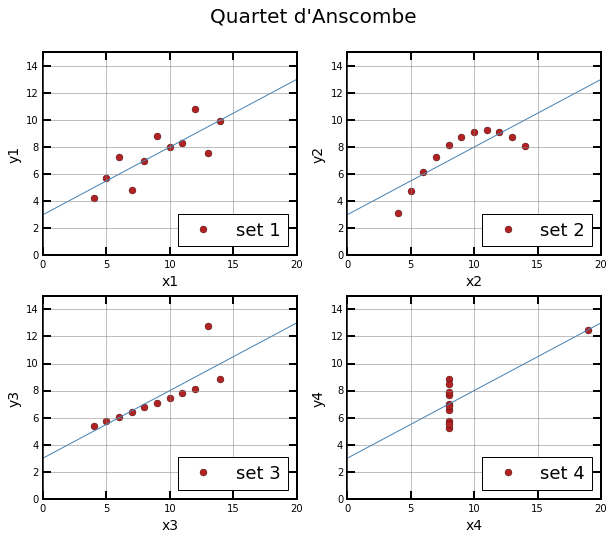

In [14]:
fig = plt.figure(figsize=(10, 8))
fig.suptitle("Quartet d'Anscombe", size=20)
for i, data in enumerate(all_sets):
    ax = plt.subplot(2, 2, i + 1)
    x, y = data
    ax.plot(x, y, marker="o", color="FireBrick", linestyle="", label="set %d" % (i+1))
    ax.set_ylabel("y%d" % (i+1), size=14)
    ax.set_xlabel("x%d" % (i+1), size=14)
    
    a, b, r, p_value, std_err = linregress(x, y)
    ax.plot([0, 20], [b, a*20 + b], color="SteelBlue")
    
    ax.set_xlim(0, 20)
    ax.set_ylim(0, 15)
    ax.legend(loc="lower right", fontsize=18)
    ax.grid(True)